In [1]:
run_path = "/DATA/phare/pharebook_data/tests/2stream/2strRefin"
run_path = "/home/smets/codeS/fAr/runs/2strRefin"

mode = 1
delta = 0.05 # finest grid size

import numpy as np
from pyphare.pharesee.run import Run
from pyphare.pharesee.hierarchy import finest_part_data
import matplotlib.pyplot as plt
from pyphare.pharesee.hierarchy import get_times_from_h5
import os
import h5py
import numpy as np
from numpy.fft import fft
#from pyphare.pharesee.hierarchy import finest_field
from scipy.optimize import curve_fit

In [2]:
def getAllPart(run_path, time, pop, refine):    
    return Run(run_path).GetParticles(time=time, pop_name=pop)

In [3]:
time = 84.4
pop = ["main", "beam"]

allParts = getAllPart(run_path, time=time, pop=pop, refine=False)

(2773,)
(2774,)
(2701,)
(2789,)
(2752,)
(2711,)
(1991,)
(2160,)
(2026,)
(1991,)
(1942,)
(1998,)
(1971,)
(2175,)
(2013,)
(1988,)
(3040,)
(2288,)
(2360,)
(2479,)
(3224,)
(3109,)
(1650,)
(1777,)
(1612,)
(1670,)
(1892,)
(1745,)
(1542,)
(1850,)
(1684,)
(1622,)


In [4]:
particles = finest_part_data(allParts)

IndexError: index 1 is out of bounds for axis 1 with size 1

In [5]:
type(allParts)

pyphare.pharesee.hierarchy.PatchHierarchy

In [6]:
particles

{'main_domain': <pyphare.pharesee.particles.Particles at 0x7f63624dd950>,
 'beam_domain': <pyphare.pharesee.particles.Particles at 0x7f63943778d0>}

No handles with labels found to put in legend.


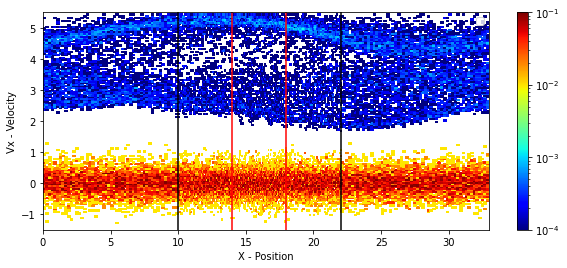

In [18]:
xlim=(0, 33)
ylim=(-1.5, 5.5)

fig, ax = plt.subplots(figsize=(10,4))
allParts.dist_plot(axis=("x", "Vx"),
                   ax=ax,
                   finest=True,
                   #gaussian_filter_sigma=(1,1),
                   #median_filter_size=(2,2),
                   color_scale="log",
                   #cmap="viridis",
                   color_max=0.1,
                   xlim=xlim,
                   ylim=ylim,
                   vmin=ylim[0],
                   vmax=ylim[1],
                   #title="2 stream [ {} ]".format(run_path),
                   xlabel="X - Position",
                   ylabel= "Vx - Velocity"
                  )
ax.vlines(10, ylim[0], ylim[1], color="k")
ax.vlines(14, ylim[0], ylim[1], color="r")
ax.vlines(18, ylim[0], ylim[1], color="r")
ax.vlines(22, ylim[0], ylim[1], color="k")
fig.savefig("dist.png", bbox_inches='tight')

In [ ]:
plt.clf()

xlim=(0, 33)
ylim=(-1.5, 5.5)

allParts1 = getAllPart(run_path, time=0, pop=pop, refine=False)
allParts2 = getAllPart(run_path, time=64, pop=pop, refine=False)
allParts3 = getAllPart(run_path, time=85.4, pop=pop, refine=False)

fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, sharex='row', figsize=(10,8))

allParts1.dist_plot(axis=("x", "Vx"),
                   ax=ax1,
                   finest=True,
                   #sigma=(1,1),
                   color_scale="log",
                   color_max=0.1,
                   xlim=xlim,
                   ylim=ylim,
                   vmin=ylim[0],
                   vmax=ylim[1],
                   #title="2 stream [ {} ]".format(run_path),
                   xlabel="",
                   ylabel= ""
                  )
ax1.vlines(10, ylim[0], ylim[1], color="k")
ax1.vlines(14, ylim[0], ylim[1], color="r")
ax1.vlines(18, ylim[0], ylim[1], color="r")
ax1.vlines(22, ylim[0], ylim[1], color="k")

allParts2.dist_plot(axis=("x", "Vx"),
                   ax=ax2,
                   finest=True,
                   #sigma=(1,1),
                   color_scale="log",
                   color_max=0.1,
                   xlim=xlim,
                   ylim=ylim,
                   vmin=ylim[0],
                   vmax=ylim[1],
                   #title="2 stream [ {} ]".format(run_path),
                   xlabel="",
                   ylabel= "Vx - Velocity"
                  )
ax2.vlines(10, ylim[0], ylim[1], color="k")
ax2.vlines(14, ylim[0], ylim[1], color="r")
ax2.vlines(18, ylim[0], ylim[1], color="r")
ax2.vlines(22, ylim[0], ylim[1], color="k")

allParts3.dist_plot(axis=("x", "Vx"),
                   ax=ax3,
                   finest=True,
                   #sigma=(1,1),
                   color_scale="log",
                   color_max=0.1,
                   xlim=xlim,
                   ylim=ylim,
                   vmin=ylim[0],
                   vmax=ylim[1],
                   #title="2 stream [ {} ]".format(run_path),
                   xlabel="X - Position",
                   ylabel= ""
                  )
ax3.vlines(10, ylim[0], ylim[1], color="k")
ax3.vlines(14, ylim[0], ylim[1], color="r")
ax3.vlines(18, ylim[0], ylim[1], color="r")
ax3.vlines(22, ylim[0], ylim[1], color="k")

for ax in (ax1,ax2):
   ax.tick_params(labelbottom=False)

fig.savefig("3dist.png", bbox_inches='tight')

In [ ]:
plt.clf()
plt.figure(figsize=(10,4))
plt.scatter(particles["main_domain"].x,
            particles["main_domain"].v[:,0],
            s=particles["main_domain"].weights*100)
plt.scatter(particles["beam_domain"].x,
            particles["beam_domain"].v[:,0],
            s=particles["beam_domain"].weights*10000)
plt.axvspan( 0, 10,facecolor="0.8", alpha=0.2, linewidth=0.0)
plt.axvspan(14,18,facecolor="0.8", alpha=0.2, linewidth=0.0)
plt.axvspan(22,33,facecolor="0.8", alpha=0.2, linewidth=0.0)
plt.xlim((0,33))
plt.ylim((-2,+7))
plt.xlabel("X")
plt.ylabel("Vx")
plt.title("Time : {:8.4f}".format(time))

plt.savefig("scatter.pdf")
plt.show()

In [ ]:
file = os.path.join(run_path, "EM_B.h5")
all_times = get_times_from_h5(file)
sparse_times = all_times[0:801:20]

In [ ]:
def getMode(t, m):
    return np.absolute(fft(t)[m])

In [ ]:
r = Run(run_path)
byz = np.array([])

for time in sparse_times:
    B = r.GetB(time)
    by, x = finest_field(B, "By")
    bz, x = finest_field(B, "Bz")

    x_fine = np.arange(x[0], x[-1], delta)
    by_fine = np.interp(x_fine, x, by)
    bz_fine = np.interp(x_fine, x, bz)

    mm = getMode(by_fine-1j*bz_fine, mode)
    byz = np.append(byz, mm)

def croaCroa(x, a, b):
    return a*np.exp(np.multiply(b, x))

popt, pcov = curve_fit(croaCroa, sparse_times, byz, p0=[0.1, 0.1])

plt.clf()
plt.figure(figsize=(6,4))

#plt.stem(sparse_times, byz, linefmt='-k', basefmt=' ', use_line_collection=True)
plt.plot(sparse_times, byz, color='k', linestyle=' ', marker='o')
plt.plot(sparse_times, croaCroa(sparse_times, popt[0], popt[1]), color='red')

plt.xlabel("Time")
plt.ylabel("First mode")#FFT ($B_y - \imath B_z$) : Mode m=1")
#plt.text(0, 28, "$\gamma$ = {:6.4f}".format(popt[1]))
print("gamma : {}".format(popt[1]))
print(pcov)

plt.savefig("gamma.png", bbox_inches='tight')
plt.show()

In [ ]:
xlim=(0, 33)
ylim=(-1.5, 5.5)

#movie
for it,t in enumerate(all_times):
    fig, ax = plt.subplots(figsize=(10,4))
    allParts = getAllPart(run_path, time=t, pop=["main", "beam"], refine=False)
    allParts.dist_plot(axis=("x", "Vx"),
                       ax=ax,
                       finest=True,
                       sigma=(1,1),
                       color_scale="log",
                       color_max=0.1,
                       xlim=xlim,
                       ylim=ylim,
                       vmin=ylim[0],
                       vmax=ylim[1],
                       title="2 stream [ {:s} ] - Time : {:8.4f}".format(run_path, t),
                       xlabel="X - Position",
                       ylabel= "Vx - Velocity"
                      )    
    ax.vlines(10, ylim[0], ylim[1], color="k")
    ax.vlines(14, ylim[0], ylim[1], color="r")
    ax.vlines(18, ylim[0], ylim[1], color="r")
    ax.vlines(22, ylim[0], ylim[1], color="k")
    fig.savefig("mp4/s_{:04d}.png".format(it))
    fig.clf()
    plt.close(fig)

In [ ]:
# ffmpeg -r 24 -y -i s_%04d.png -b:v 18000k -pix_fmt yuv420p dist.mp4

In [ ]:
xlim=(-2, 6)
ylim=(-4, 4)

for it,t in enumerate(all_times):
    fig, ax = plt.subplots(figsize=(8,10))
    allParts = getAllPart(run_path, time=t, pop=["main", "beam"], refine=False)
    allParts.dist_plot(axis=("Vx", "Vy"),
                       ax=ax,
                       finest=True,
                       sigma=(1,1),
                       color_scale="log",
                       color_max=0.1,
                       xlim=xlim,
                       ylim=ylim,
                       vmin=ylim[0],
                       vmax=xlim[1],
                       title="2 stream [ RhR ] - Time : {:8.4f}".format(t),
                       xlabel="VX - Velocity",
                       ylabel= "Vy - Velocity"
                      )    
    ax.vlines(10, ylim[0], ylim[1], color="k")
    ax.vlines(14, ylim[0], ylim[1], color="r")
    ax.vlines(18, ylim[0], ylim[1], color="r")
    ax.vlines(22, ylim[0], ylim[1], color="k")
    fig.savefig("mp4/t_{:04d}.png".format(it))
    fig.clf()
    plt.close(fig)